In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from tensorflow.keras import layers

import numpy as np
np.set_printoptions(precision=5)
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
import pandas as pd
pd.options.display.float_format = '{:,.5f}'.format
import scipy as sp
from scipy import stats
import sklearn

from scipy.stats import norm
import matplotlib.mlab as mlab

#from statsmodels.stats.diagnostic import lilliefors
#import statsmodels.api as sm 
from scipy.stats import chisquare

import pingouin as pg

from sklearn.preprocessing import PowerTransformer
import scipy.stats

import statsmodels.stats.weightstats as wstats

import time

/Users/ravithree/Library/Python/3.7/lib/python/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.3.11.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/Users/ravithree/Library/Python/3.7/lib/python/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
CSN_path = './Data/'



def load_CSN_data():
    csv_path = CSN_path + "Master_List_LCPLCP.csv"
    return pd.read_csv(csv_path)

CSN = load_CSN_data()

CSN_new_err = CSN['Error'][-18:]

CSN = CSN.drop(['Example ID', 'Source', 'Figure ID', 'Data Provider', 'PI',
       'Date Received', 'Data Measurment Published', 'Prior Exposure', 'Comments', 'Error'], axis=1)

#tsize = CSN.shape[0]//10

CSN_new = pd.get_dummies(CSN)


CSN_new['Surface Area per Liter'] = CSN_new['Surface Area (NMC) (m2/g)'] * CSN_new['Concentration (mg/L)']
CSN_new = CSN_new.drop(['Surface Area (NMC) (m2/g)'], axis=1)

CSN_new['log Concentration'] = np.log10(CSN_new['Concentration (mg/L)'] + 1e-9)
CSN_new = CSN_new.drop(['Concentration (mg/L)'], axis=1)

#CSN_hold = sklearn.utils.shuffle(CSN_new, random_state=65788)
CSN_new = CSN_new[-18:]
#CSN_test = CSN_hold[-tsize:]

In [3]:
#206 machine ELU, ELU, ReLU but with new LCPLCP database
out = np.load('Data/true_test_L_eluelurelu.pkl', allow_pickle=True)

In [4]:
def cohen_dd(a,b,c,d):
    na = 100
    nb = 100
    dof = na + nb - 2
    Mean1 = a
    Mean2 = b
    STD1 = c
    STD2 = d
    cohenDD = (Mean1 - Mean2)/ np.sqrt(((na-1)*(STD1)** 2 + (nb-1)*(STD2)** 2) / dof)
    
              
    print (cohenDD)
    return cohenDD

In [5]:
def ztest(a1,a2,delta,c1,c2,n):
    z = (a1-a2-delta)/np.sqrt(((c1**2)/n)+((c2**2)/n))
    print (z)
    return z

0.40815672203898423
0.28551493218541135
0.1597378059402108
0.4132142900824547
0.42361213314533236
0.18494674172997483
0.04633031699061391
0.22502741087973116
0.2738862149640918
0.29155425193905826
0.11581649154424667
0.652241904973507
0.7109222118735314
0.642422265625894
0.16058349325573443
0.19873297596644163
0.1964321039258766
0.17771618020837307


/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


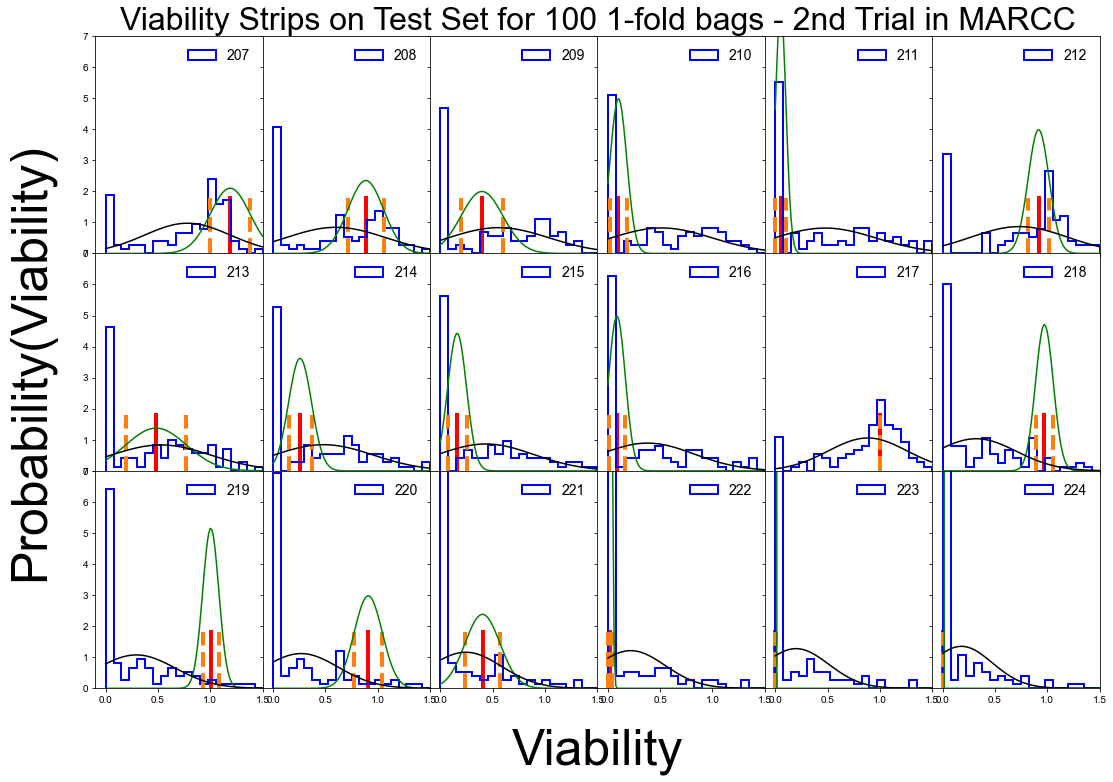

In [6]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
plt.title('Viability Strips on Test Set for 100 1-fold bags - 2nd Trial in MARCC',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out[:, 0, 0, i])
    variance= np.var(out[:, 0, 0, i])
    sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    #percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out[:, 0, 0, i])
    #print (V)
    
    W = stats.normaltest(out[:, 0, 0, i])
    #print (W)
    
    A = scipy.stats.ttest_1samp(out[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.1, 1.5])
    axes[i].hist(out[:, 0, 0, i], bins=20, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+207, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    x = np.linspace(x_min, x_max, 100)

    y = scipy.stats.norm.pdf(x,mean,std)
    
    axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    y1 = scipy.stats.norm.pdf(x,M,sigma1)
    axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_dd(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,100)
    
#plt.show()
#plt.savefig('A_100_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [7]:
   a_list =[]
b_list =[]
for i in np.arange(18):
            x2 = [i for i in CSN_new['Viability Fraction ']][i]
 
            a_list.append(x2)
    
            M =np.mean(out[:, 0, 0, i])
            b_list.append(M)

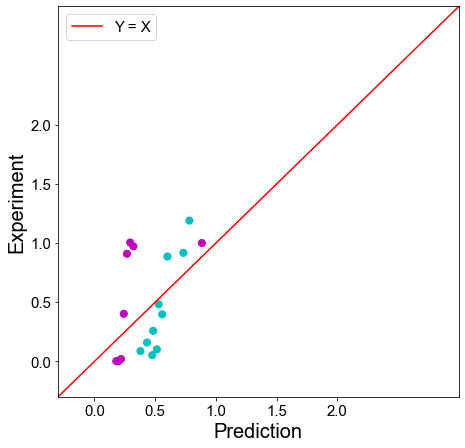

In [8]:
categories = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
colormap = np.array(['c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list, a_list, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

0.3665150187710148
0.3380283239473638
0.10251858434868477
0.34291495514828324
0.33053644755605877
0.15269863337900025
0.0061012905105496396
0.16264148293746744
0.2104224089263745
0.23841283678334438
0.07577425111760971
0.67314594147457
0.728054936457541
0.6553150572429528


/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


0.16857673546402763
0.19525758988470437
0.19548430395798133
0.17895935846267733


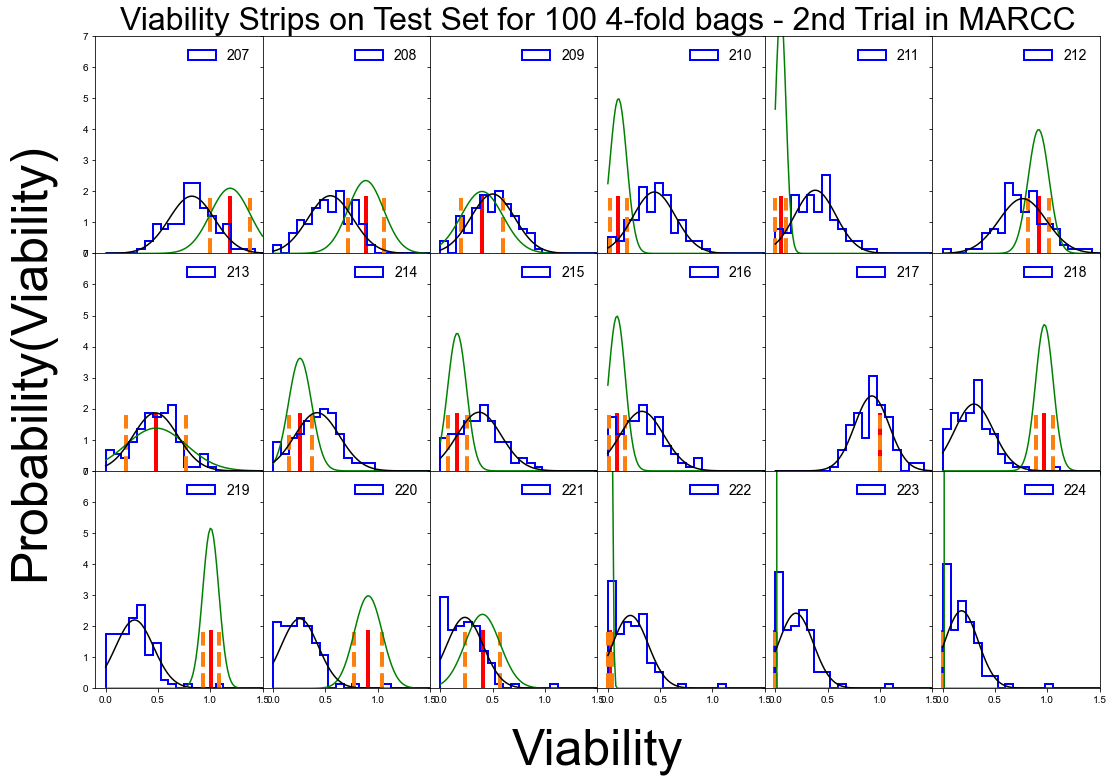

In [9]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
plt.title('Viability Strips on Test Set for 100 4-fold bags - 2nd Trial in MARCC',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out[:, 1, 0, i])
    variance= np.var(out[:, 1, 0, i])
    sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    #percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out[:, 1, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out[:, 1, 0, i])
    #print (V)
    
    W = stats.normaltest(out[:, 1, 0, i])
    #print (W)
    
    A = scipy.stats.ttest_1samp(out[:, 1, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.1, 1.5])
    axes[i].hist(out[:, 1, 0, i], bins=20, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+207, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    x = np.linspace(x_min, x_max, 100)

    y = scipy.stats.norm.pdf(x,mean,std)
    
    axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    y1 = scipy.stats.norm.pdf(x,M,sigma1)
    axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_dd(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,100)
#plt.show()
#plt.savefig('B_100_4.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [10]:
  a_list2 =[]
b_list2 =[]
for i in np.arange(18):
            x2 = [i for i in CSN_new['Viability Fraction ']][i]
 
            a_list2.append(x2)
    
            M =np.mean(out[:, 1, 0, i])
            b_list2.append(M)

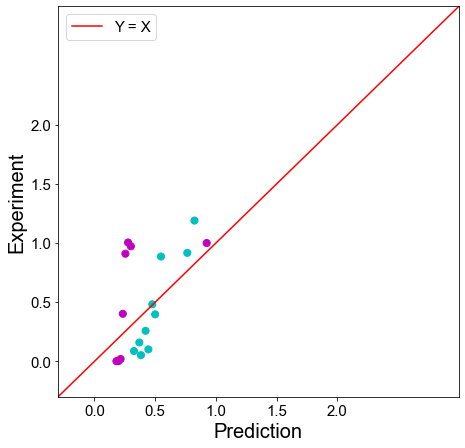

In [11]:
categories = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
colormap = np.array(['c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list2, a_list2, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

0.3320780048177482
0.3034039718275574
0.13086051417899602
0.3708496007769924
0.3656102559222623
0.13056105198448975
0.0036410073932265363
0.16545790916644432
0.21073576200658947
0.23044672244317896
0.07340226174238851
0.6594445367885038
0.7193368145017823
0.6511726873383987
0.16813608170606548
0.1918185216791611
0.18931055781935416
0.17132751976533525


/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


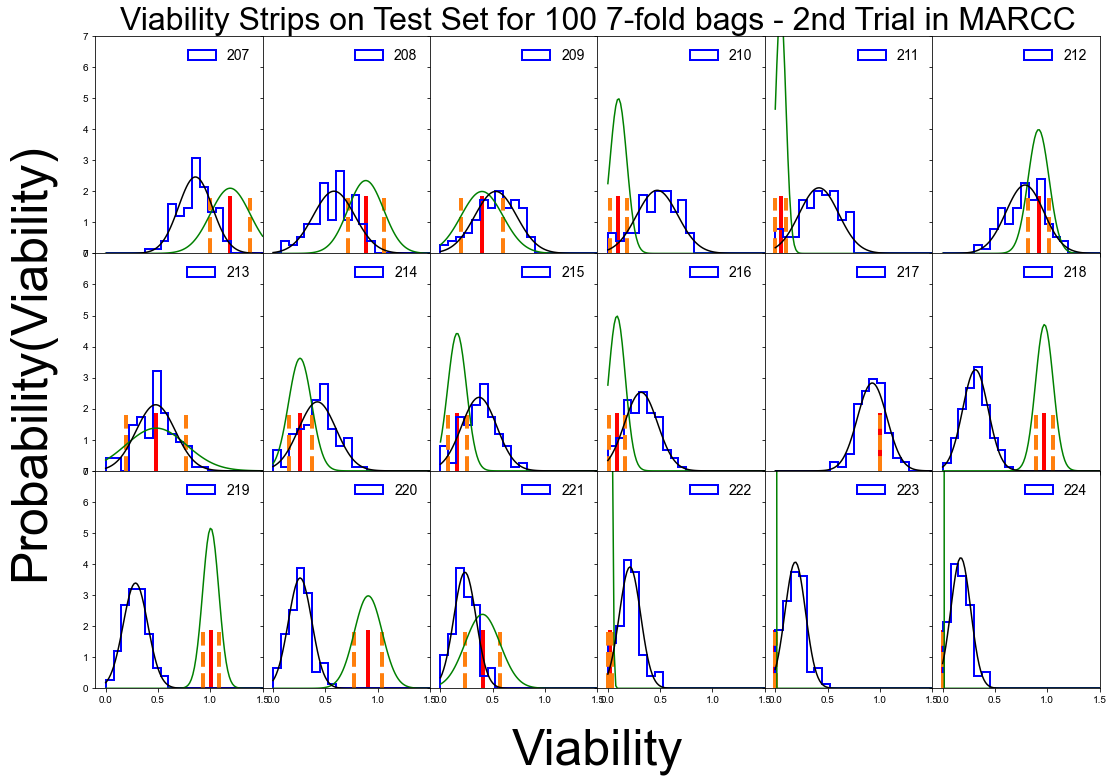

In [12]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
plt.title('Viability Strips on Test Set for 100 7-fold bags - 2nd Trial in MARCC',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out[:, 2, 0, i])
    variance= np.var(out[:, 2, 0, i])
    sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out[:, 2, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out[:, 2, 0, i])
    #print (V)
    
    W = stats.normaltest(out[:, 2, 0, i])
    #print (W)
    
    A = scipy.stats.ttest_1samp(out[:, 2, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.1, 1.5])
    axes[i].hist(out[:, 2, 0, i], bins=20, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+207, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    x = np.linspace(x_min, x_max, 100)

    y = scipy.stats.norm.pdf(x,mean,std)
    
    axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    y1 = scipy.stats.norm.pdf(x,M,sigma1)
    axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_dd(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,100)
#plt.show()
#plt.savefig('C_100_7.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [13]:
   a_list3 =[]
b_list3 =[]
for i in np.arange(18):
            x2 = [i for i in CSN_new['Viability Fraction ']][i]
 
            a_list3.append(x2)
    
            M =np.mean(out[:, 2, 0, i])
            b_list3.append(M)

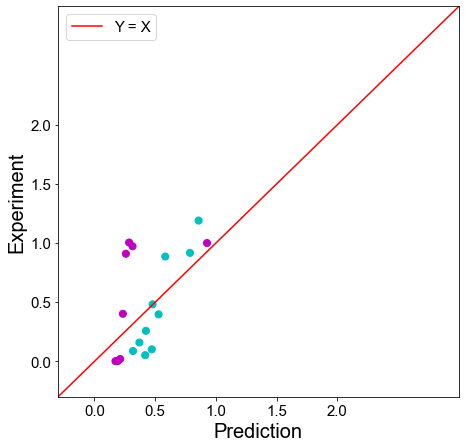

In [14]:
categories = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
colormap = np.array(['c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list3, a_list3, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

0.33340281260188664
0.3060251045330581
0.129653396798053
0.3667055778359714
0.3541478672713357
0.1244544176729585
0.006741148984619139
0.17603990601860248
0.21962609224302013
0.24007897030955935
0.06105076441232493
0.6812823036019646
0.7396770597201923
0.6695939984176325
0.1843328405737132
0.17747355327161263
0.1764871515758861
0.16024659437881753


/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


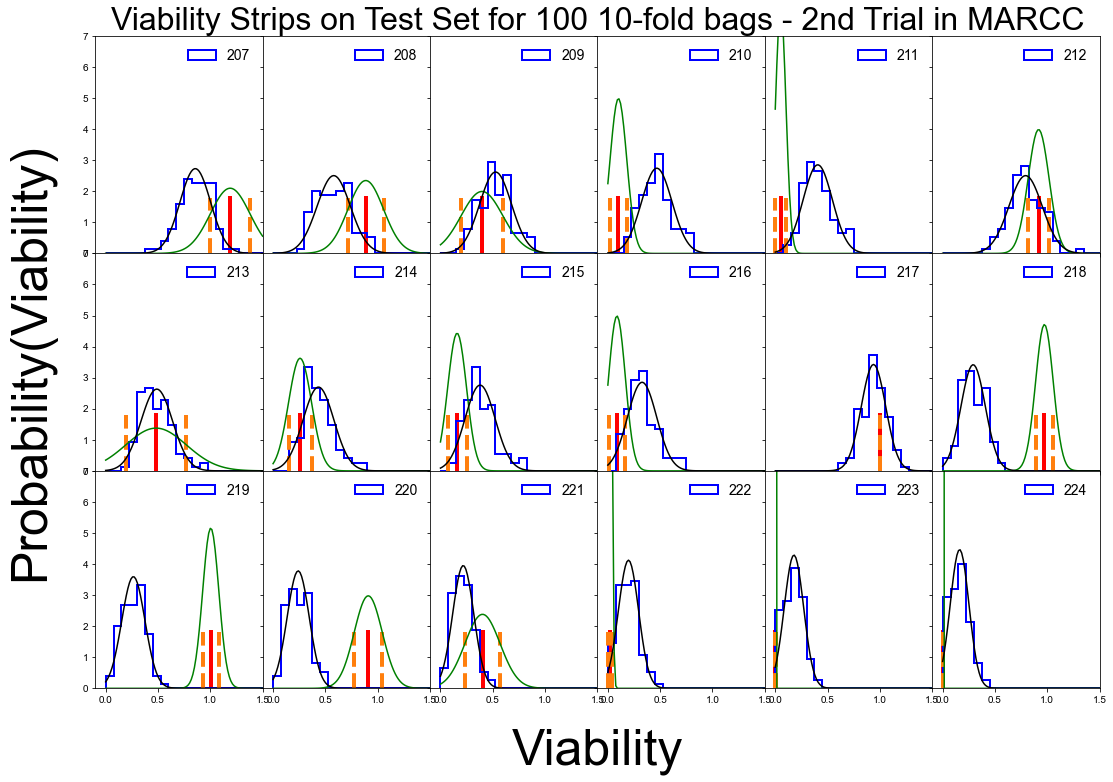

In [15]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
plt.title('Viability Strips on Test Set for 100 10-fold bags - 2nd Trial in MARCC',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out[:, 3, 0, i])
    variance= np.var(out[:, 3, 0, i])
    sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out[:, 3, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out[:, 3, 0, i])
    #print (V)
    
    W = stats.normaltest(out[:, 3, 0, i])
    #print (W)
    
    A = scipy.stats.ttest_1samp(out[:, 3, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.1, 1.5])
    axes[i].hist(out[:, 3, 0, i], bins=20, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+207, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    x = np.linspace(x_min, x_max, 100)

    y = scipy.stats.norm.pdf(x,mean,std)
    
    axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    y1 = scipy.stats.norm.pdf(x,M,sigma1)
    axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_dd(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,100)
#plt.show()
#plt.savefig('D_100_10.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [16]:
  a_list4 =[]
b_list4 =[]
for i in np.arange(18):
            x2 = [i for i in CSN_new['Viability Fraction ']][i]
 
            a_list4.append(x2)
    
            M =np.mean(out[:, 3, 0, i])
            b_list4.append(M)

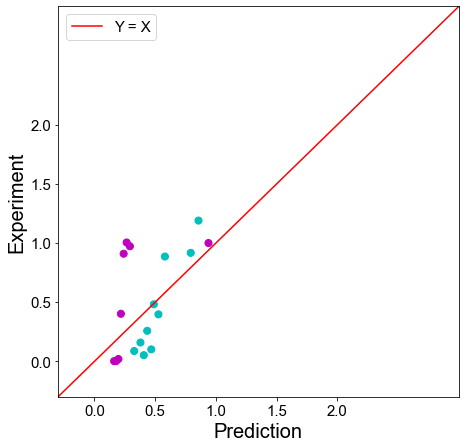

In [17]:
categories = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
colormap = np.array(['c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list4, a_list4, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

In [18]:
###End of 206-T18 machine

In [19]:
### start of 186-T18 machine

In [20]:
CSN_path = './Data/'

def load_CSN_data():
    csv_path = CSN_path + "Master_List_LCPLCP.csv"
    return pd.read_csv(csv_path)

CSN = load_CSN_data()

CSN_new_err = CSN['Error'][-18:]

CSN = CSN.drop(['Example ID', 'Source', 'Figure ID', 'Data Provider', 'PI',
       'Date Received', 'Data Measurment Published', 'Prior Exposure', 'Comments', 'Error'], axis=1)

tsize = CSN.shape[0]//10

CSN_new = pd.get_dummies(CSN)

CSN_new['Surface Area per Liter'] = CSN_new['Surface Area (NMC) (m2/g)'] * CSN_new['Concentration (mg/L)']
CSN_new = CSN_new.drop(['Surface Area (NMC) (m2/g)'], axis=1)

CSN_new['log Concentration'] = np.log10(CSN_new['Concentration (mg/L)'] + 1e-9)
CSN_new = CSN_new.drop(['Concentration (mg/L)'], axis=1)

CSN_new_A = CSN_new[-18:] #assign the last 18 examples for 18 test cases for a different array

CSN_prepared_B = CSN_new[:-18] # Removing the last 18 
CSN_hold_1 = sklearn.utils.shuffle(CSN_prepared_B, random_state=5946) #shuffling the 206 data examples as Clyde did
tsize1 = CSN_hold_1.shape[0]//10 # decide the size of the test examples which is 20 - clyde did it

CSN_prepared_B = CSN_hold_1[:-tsize1] #Remove that 20 data examples from the bottom of the list
CSN_test = CSN_hold_1[-tsize1:] # assign that 20 data examples whcih we will use later

#CSN_new_err2 = CSN_test['Error']


In [21]:
##186 machine elu elu relu adam but with new database LCPLCP
out5 = np.load('Data/true_test_186_100_real_20_clydetookout_L_eluelurelu.pkl', allow_pickle=True)

0.4074053306877613
0.1941725268065928
0.25524164903163904
0.5061875698119402
0.5114669853560626
0.17022099506855015
0.14116397830843924
0.3263115757405758
0.38188354632258414
0.41367555822432045
0.13858013615012166
0.5622708068187237
0.6177451566785574
0.5461720034772157
0.061916349895954126
0.2972138176701546
0.29233820036195995
0.2714909376681328


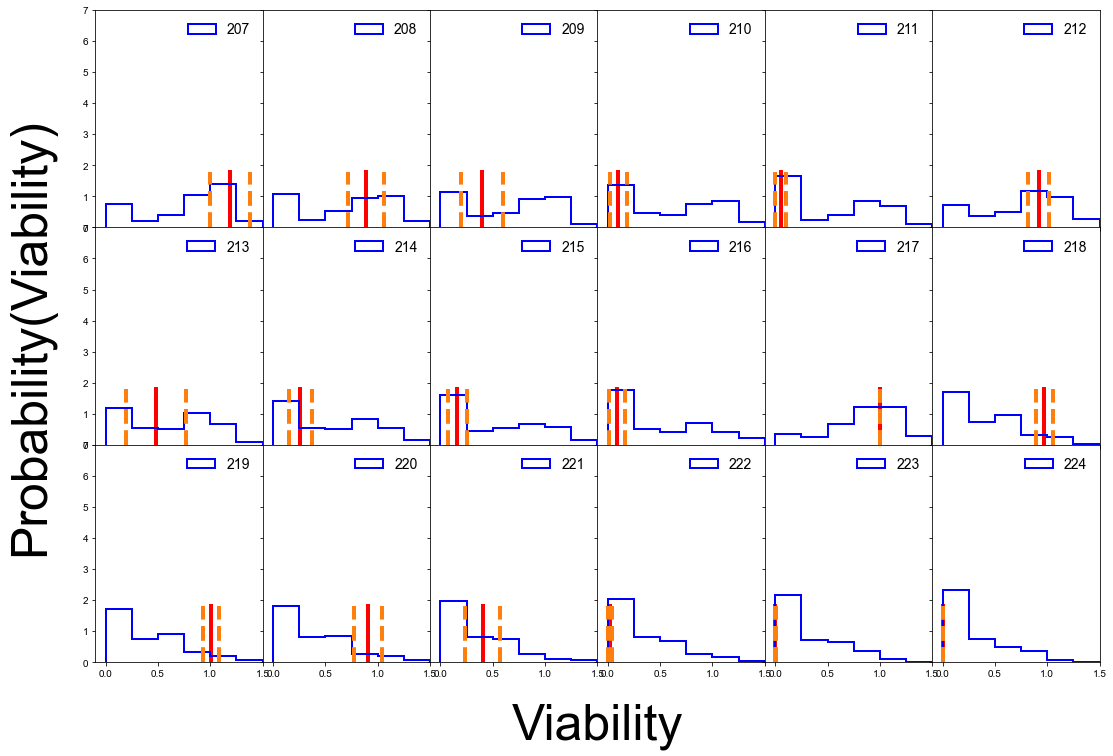

In [22]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 1000 1-fold bags ',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new_A['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new_A['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out5[:, 0, 0, i])
    ####variance= np.var(out5[:, 0, 0, i])
    ####sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    ####percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out5[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out5[:, 0, 0, i])
    #print (V)
    
    ####W = stats.normaltest(out5[:, 0, 0, i])
    #print (W)
    
    ####A = scipy.stats.ttest_1samp(out5[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.1, 1.5])
    axes[i].hist(out5[:, 0, 0, i], bins=6, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+207, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    ####x = np.linspace(x_min, x_max, 1000)

    ####y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    ####y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_d1000(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,1000)
    
#plt.show()
#plt.savefig('A_1000_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [23]:
   a_list5 =[]
b_list5 =[]
for i in np.arange(18):
            x2 = [i for i in CSN_new_A['Viability Fraction ']][i]
 
            a_list5.append(x2)
    
            M =np.mean(out5[:, 0, 0, i])
            b_list5.append(M)

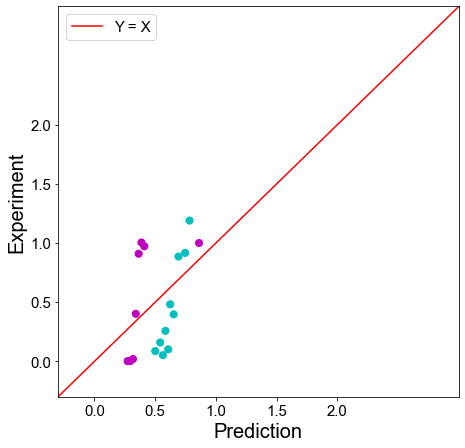

In [24]:
categories = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
colormap = np.array(['c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list5, a_list5, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

0.3535211490158785
0.3145016204465909
0.13439931775025094
0.3889468057263363
0.3961620158830973
0.1391037385385353
0.03234204914886424
0.21570447354825012
0.2732358279517051
0.30281041799803055
0.11927102445903681
0.611867283209064
0.6655925619081586
0.5917310073209101
0.10396865177523762
0.25986926238861296
0.2596629532855616
0.2422489064897971


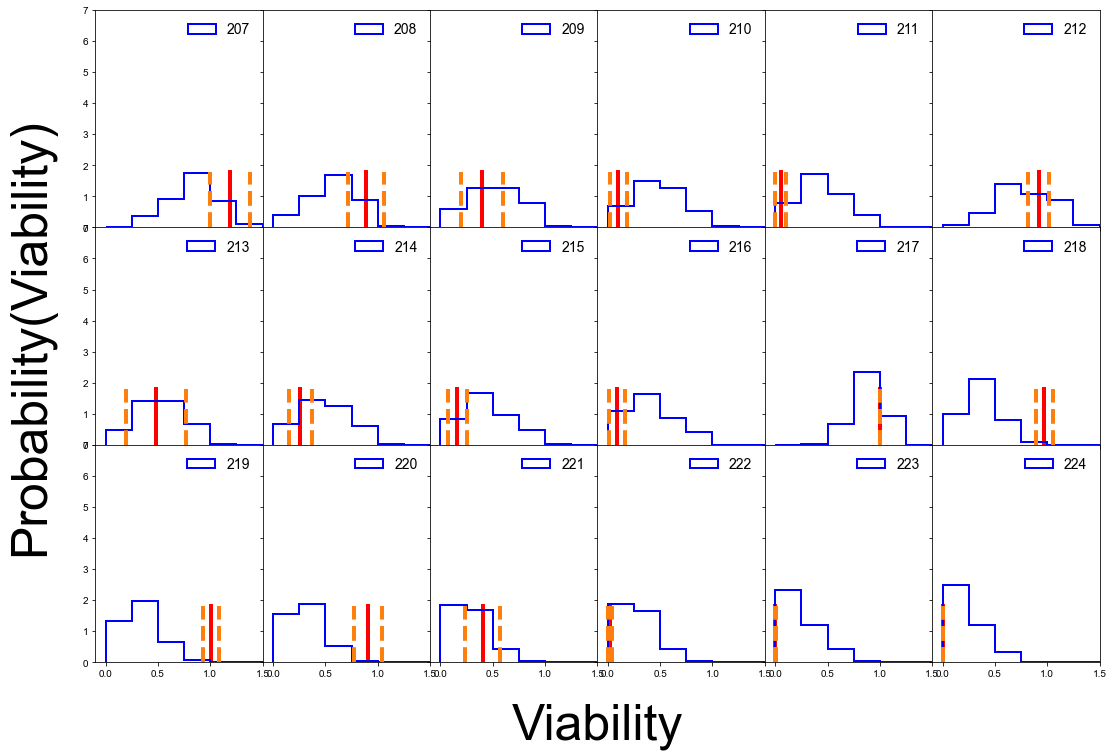

In [25]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 1000 1-fold bags ',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new_A['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new_A['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out5[:, 1, 0, i])
    ####variance= np.var(out5[:, 1, 0, i])
    ####sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    ####percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out5[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out5[:, 0, 0, i])
    #print (V)
    
    ####W = stats.normaltest(out5[:, 0, 0, i])
    #print (W)
    
    ####A = scipy.stats.ttest_1samp(out5[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.1, 1.5])
    axes[i].hist(out5[:, 1, 0, i], bins=6, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+207, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    ####x = np.linspace(x_min, x_max, 1000)

    ####y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    ####y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_d1000(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,1000)
    
#plt.show()
#plt.savefig('A_1000_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [26]:
  a_list6 =[]
b_list6 =[]
for i in np.arange(18):
            x2 = [i for i in CSN_new_A['Viability Fraction ']][i]
 
            a_list6.append(x2)
    
            M =np.mean(out5[:, 1, 0, i])
            b_list6.append(M)

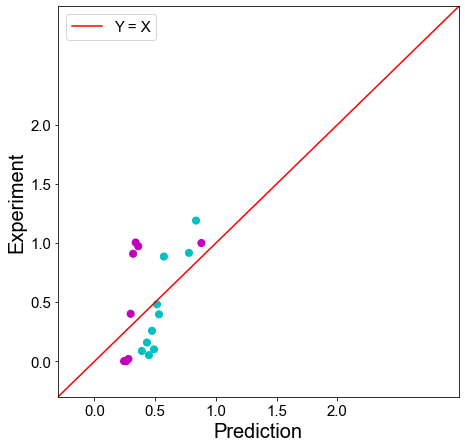

In [27]:
categories = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
colormap = np.array(['c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list6, a_list6, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

0.37818849089272266
0.29031034813789514
0.1573352897787781
0.40715122778776225
0.4076799664250525
0.15370078401982312
0.03535716785789328
0.22157656595850872
0.2813420100920413
0.31358310107794374
0.10657452170439752
0.5702007079681543
0.6272319307139739
0.5568767778173468
0.07219773161845522
0.2876203065967609
0.2838420423277493
0.263843825837055


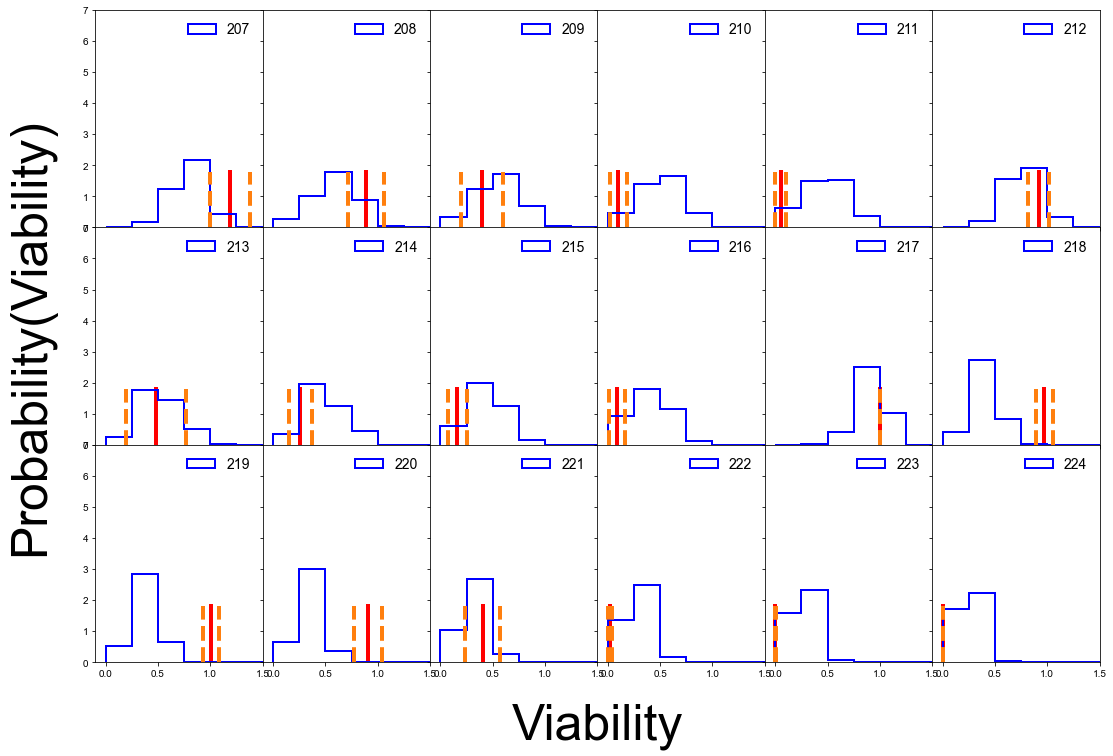

In [28]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 1000 1-fold bags ',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new_A['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new_A['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out5[:, 2, 0, i])
    ####variance= np.var(out5[:, 2, 0, i])
    ####sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    ####percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out5[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out5[:, 0, 0, i])
    #print (V)
    
    ####W = stats.normaltest(out5[:, 0, 0, i])
    #print (W)
    
    ####A = scipy.stats.ttest_1samp(out5[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.1, 1.5])
    axes[i].hist(out5[:, 2, 0, i], bins=6, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+207, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    ####x = np.linspace(x_min, x_max, 1000)

    ####y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    ####y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_d1000(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,1000)
    
#plt.show()
#plt.savefig('A_1000_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [29]:
   a_list7 =[]
b_list7 =[]
for i in np.arange(18):
            x2 = [i for i in CSN_new_A['Viability Fraction ']][i]
 
            a_list7.append(x2)
    
            M =np.mean(out5[:, 2, 0, i])
            b_list7.append(M)

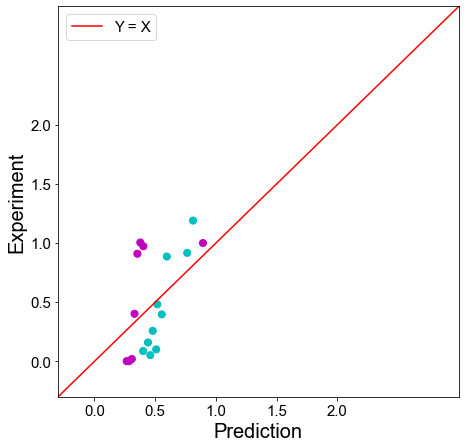

In [30]:
categories = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
colormap = np.array(['c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list7, a_list7, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

0.36300670197296026
0.25219273660487984
0.19607774638902908
0.44575963017863773
0.4427685044818868
0.13993847077041788
0.07820546597153294
0.2576528071437928
0.3083955970242368
0.3311318585543289
0.09981761382776289
0.5746976987055732
0.6320443360358985
0.5624172575377071
0.07839779791472917
0.2811228281222895
0.2768810263435516
0.2564971101990271


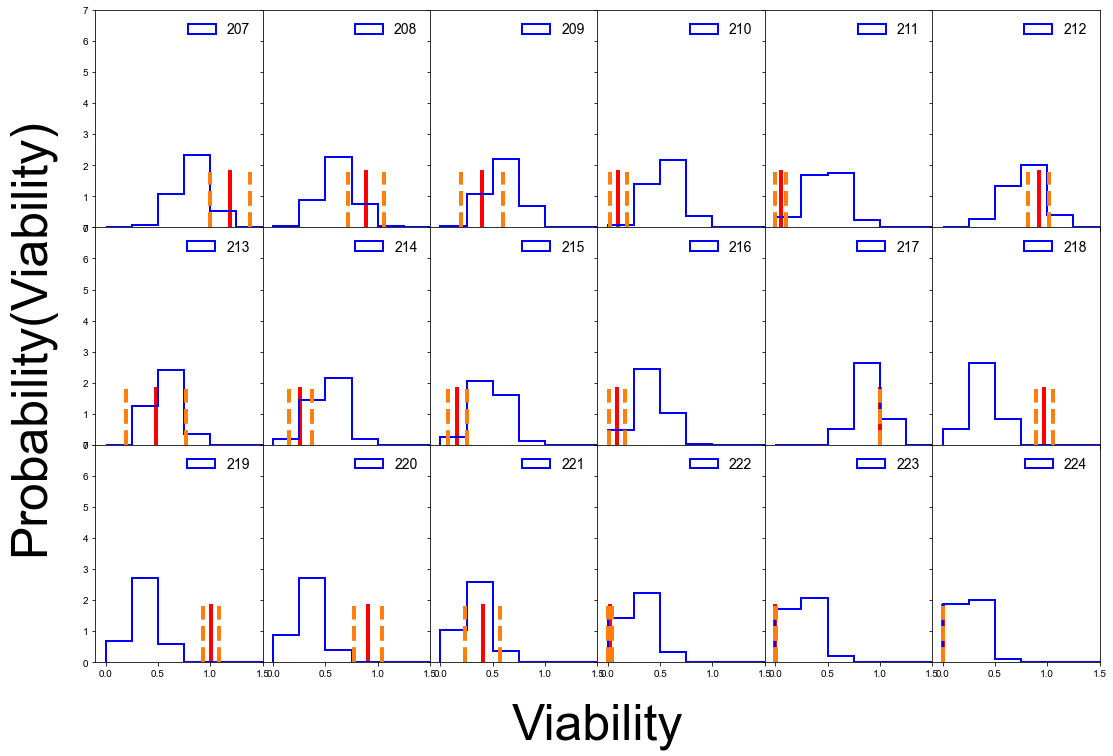

In [31]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 1000 1-fold bags ',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new_A['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new_A['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out5[:, 3, 0, i])
    ####variance= np.var(out5[:, 3, 0, i])
    ####sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    ####percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out5[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out5[:, 0, 0, i])
    #print (V)
    
    ####W = stats.normaltest(out5[:, 0, 0, i])
    #print (W)
    
    ####A = scipy.stats.ttest_1samp(out5[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.1, 1.5])
    axes[i].hist(out5[:, 3, 0, i], bins=6, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+207, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    ####x = np.linspace(x_min, x_max, 1000)

    ####y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    ####y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_d1000(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,1000)
    
#plt.show()
#plt.savefig('A_1000_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [32]:
   a_list8 =[]
b_list8 =[]
for i in np.arange(18):
            x2 = [i for i in CSN_new_A['Viability Fraction ']][i]
 
            a_list8.append(x2)
    
            M =np.mean(out5[:, 3, 0, i])
            b_list8.append(M)

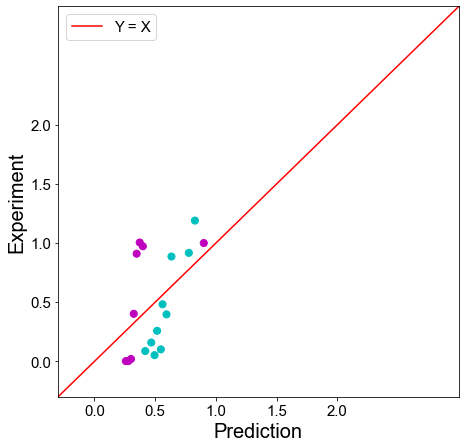

In [33]:
categories = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
colormap = np.array(['c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list8, a_list8, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

In [34]:
####End of 186-T18 machine

In [35]:
###Start of 186-T20 machine

In [36]:
out6 = np.load('Data/true_test_186_100_real_20_clydetookout_test20_L_eluelurelu.pkl', allow_pickle=True)

0.2930021847784519
0.35249914847314356
0.16045024236679062
0.0354779487459107
0.2852968332791042
0.04643754148578649
0.20753289782650008
0.3200489577412605
0.17663810580968853
0.3459609490633011
0.022655777460281357
0.0560521906614303
0.8831307194828986
0.40902674525260907
0.18235204219818113
0.13706030660867696
0.2285777939588547
0.9654174845511274
0.10203680217266087
0.011780166419879945


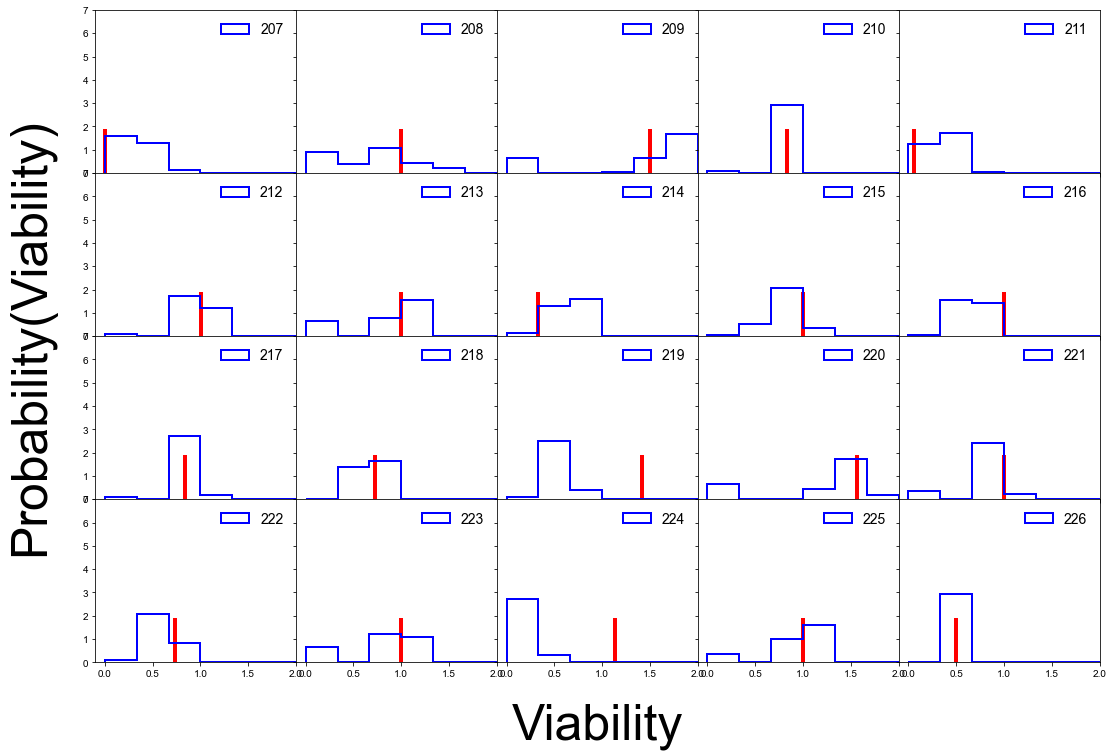

In [37]:
fig_new_dat, axes = plt.subplots(4, 5, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 1000 1-fold bags ',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(20):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_test['Viability Fraction ']][i]
    #x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_test['Viability Fraction ']][i]
    #std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out6[:, 0, 0, i])
    ####variance= np.var(out5[:, 0, 0, i])
    ####sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    ####percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out5[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out5[:, 0, 0, i])
    #print (V)
    
    ####W = stats.normaltest(out5[:, 0, 0, i])
    #print (W)
    
    ####A = scipy.stats.ttest_1samp(out5[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.1, 2.0])
    axes[i].hist(out6[:, 0, 0, i], bins=6, range=(0, 2.0), histtype='step', color='blue', density=True, label=i+207, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    #axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    #axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    ####x = np.linspace(x_min, x_max, 1000)

    ####y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    ####y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_d1000(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,1000)
    
#plt.show()
#plt.savefig('A_1000_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [38]:
  a_list9 =[]
b_list9 =[]
for i in np.arange(20):
            x2 = [i for i in CSN_test['Viability Fraction ']][i]
 
            a_list9.append(x2)
    
            M =np.mean(out6[:, 0, 0, i])
            b_list9.append(M)

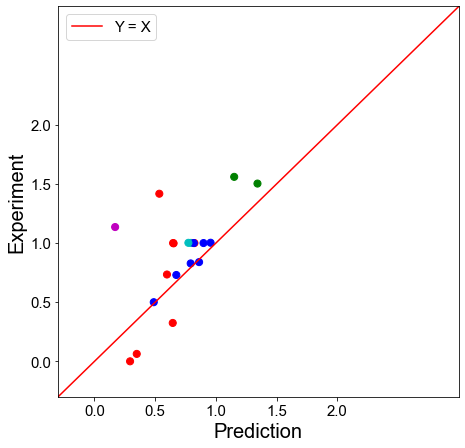

In [39]:
categories = np.array([0, 0, 1, 2, 0, 2, 3, 0, 0, 0, 2, 2, 0, 1, 2, 0, 3, 4, 2, 2])
colormap = np.array(['r', 'g', 'b', 'c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list9, a_list9, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

0.28898974911460107
0.44132693466079753
0.12090984040457076
0.05305308428355171
0.31999925842369253
0.06444767467522228
0.28902242801252387
0.2928983283754535
0.1827175277666686
0.4160873850138068
0.011594031717701347
0.09543636876032924
0.9271894247710506
0.3627232853737663
0.17439153779663485
0.20879488729705498
0.3147918457554595
0.9913751217192538
0.06041603876421264
0.0038033853671152196


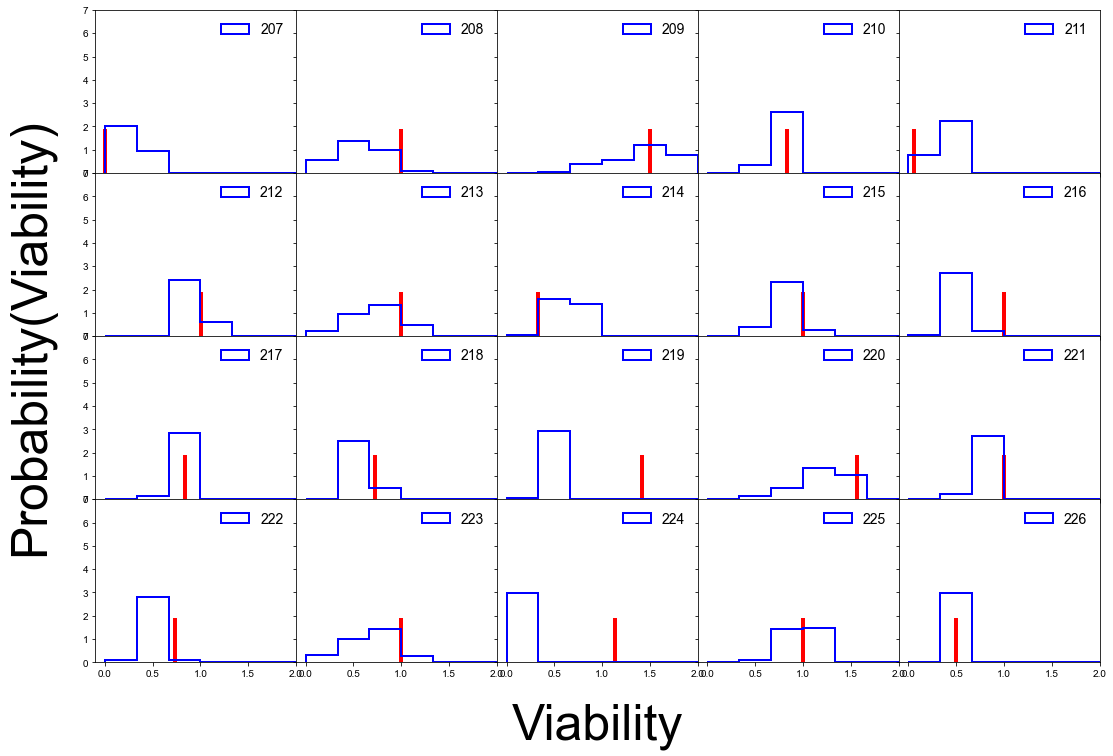

In [40]:
fig_new_dat, axes = plt.subplots(4, 5, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 1000 1-fold bags ',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(20):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_test['Viability Fraction ']][i]
    #x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_test['Viability Fraction ']][i]
    #std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out6[:, 1, 0, i])
    ####variance= np.var(out5[:, 0, 0, i])
    ####sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    ####percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out5[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out5[:, 0, 0, i])
    #print (V)
    
    ####W = stats.normaltest(out5[:, 0, 0, i])
    #print (W)
    
    ####A = scipy.stats.ttest_1samp(out5[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.1, 2.0])
    axes[i].hist(out6[:, 1, 0, i], bins=6, range=(0, 2.0), histtype='step', color='blue', density=True, label=i+207, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    #axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    #axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    ####x = np.linspace(x_min, x_max, 1000)

    ####y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    ####y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_d1000(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,1000)
    
#plt.show()
#plt.savefig('A_1000_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [41]:
  a_list10 =[]
b_list10 =[]
for i in np.arange(20):
            x2 = [i for i in CSN_test['Viability Fraction ']][i]
 
            a_list10.append(x2)
    
            M =np.mean(out6[:, 1, 0, i])
            b_list10.append(M)

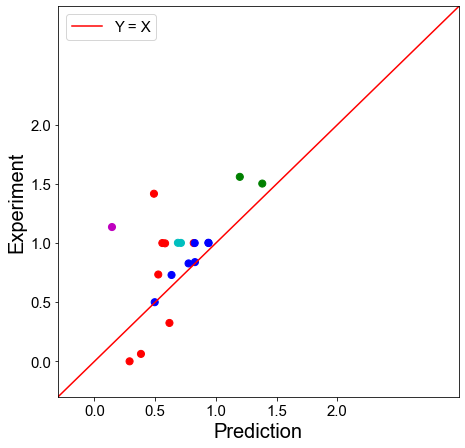

In [42]:
categories = np.array([0, 0, 1, 2, 0, 2, 3, 0, 0, 0, 2, 2, 0, 1, 2, 0, 3, 4, 2, 2])
colormap = np.array(['r', 'g', 'b', 'c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list10, a_list10, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

0.2846758349707748
0.4162241842744856
0.1158366494083034
0.05556706081776375
0.31266977805135354
0.05637465720465851
0.2364050736666632
0.318180274340481
0.17268872004052882
0.37573617895237377
0.007461269006079685
0.08429337531804915
0.8991180291218472
0.3567494003627598
0.14188725910998556
0.18367292327688012
0.25696193991074745
0.9758707614485111
0.04292621873009783
0.007955751481364348


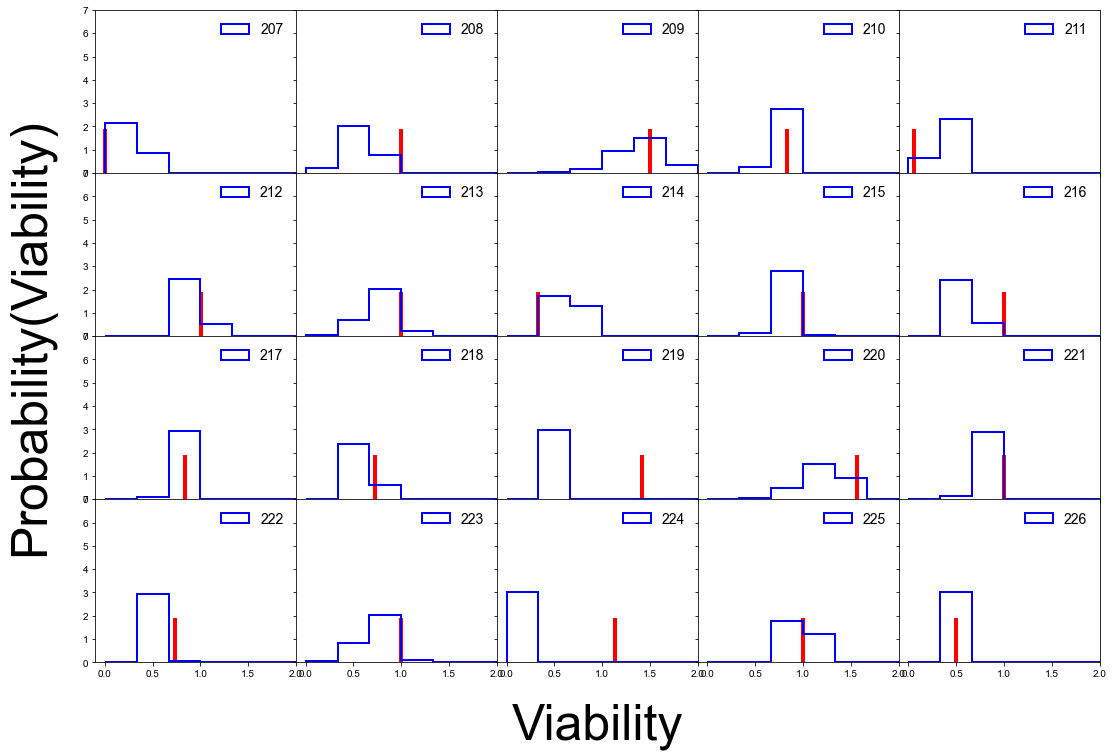

In [43]:
fig_new_dat, axes = plt.subplots(4, 5, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 1000 1-fold bags ',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(20):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_test['Viability Fraction ']][i]
    #x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_test['Viability Fraction ']][i]
    #std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out6[:, 2, 0, i])
    ####variance= np.var(out5[:, 0, 0, i])
    ####sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    ####percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out5[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out5[:, 0, 0, i])
    #print (V)
    
    ####W = stats.normaltest(out5[:, 0, 0, i])
    #print (W)
    
    ####A = scipy.stats.ttest_1samp(out5[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.1, 2.0])
    axes[i].hist(out6[:, 2, 0, i], bins=6, range=(0, 2.0), histtype='step', color='blue', density=True, label=i+207, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    #axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    #axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    ####x = np.linspace(x_min, x_max, 1000)

    ####y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    ####y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_d1000(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,1000)
    
#plt.show()
#plt.savefig('A_1000_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [44]:
   a_list11 =[]
b_list11 =[]
for i in np.arange(20):
            x2 = [i for i in CSN_test['Viability Fraction ']][i]
 
            a_list11.append(x2)
    
            M =np.mean(out6[:, 2, 0, i])
            b_list11.append(M)

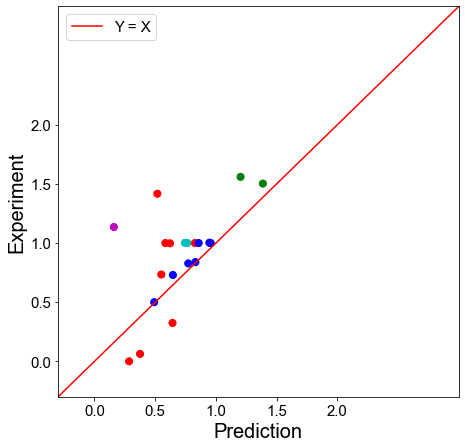

In [45]:
categories = np.array([0, 0, 1, 2, 0, 2, 3, 0, 0, 0, 2, 2, 0, 1, 2, 0, 3, 4, 2, 2])
colormap = np.array(['r', 'g', 'b', 'c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list11, a_list11, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

0.2621206367576834
0.4152768444114727
0.04295449227863224
0.044420906763816714
0.28287903306340223
0.043784178912391836
0.20751949847638507
0.3136098644965555
0.1647952807940165
0.3692775983344808
0.006044413433814566
0.08412090400101135
0.897351170561138
0.29726080214240413
0.11577408032415026
0.17763156968125826
0.2299135276640032
0.9813201667652995
0.0221427904867173
0.012640247523968251


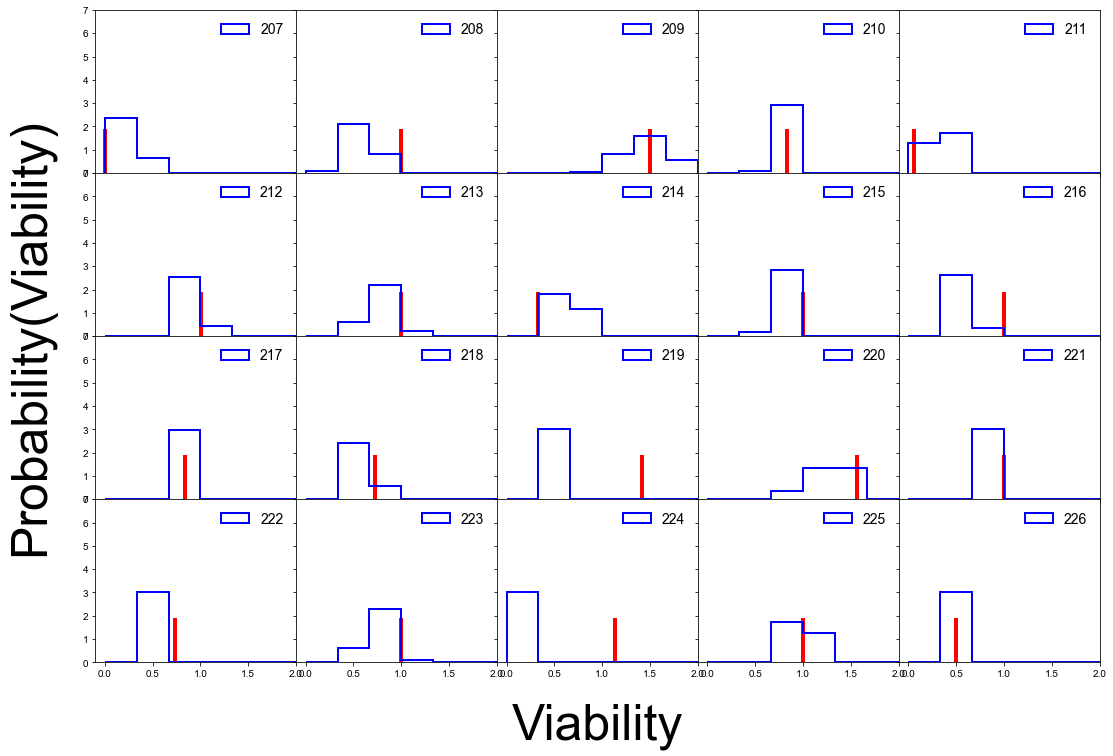

In [46]:
fig_new_dat, axes = plt.subplots(4, 5, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 1000 1-fold bags ',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(20):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_test['Viability Fraction ']][i]
    #x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_test['Viability Fraction ']][i]
    #std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out6[:, 3, 0, i])
    ####variance= np.var(out5[:, 0, 0, i])
    ####sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    ####percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out5[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out5[:, 0, 0, i])
    #print (V)
    
    ####W = stats.normaltest(out5[:, 0, 0, i])
    #print (W)
    
    ####A = scipy.stats.ttest_1samp(out5[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.1, 2.0])
    axes[i].hist(out6[:, 3, 0, i], bins=6, range=(0, 2.0), histtype='step', color='blue', density=True, label=i+207, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    #axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    #axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    ####x = np.linspace(x_min, x_max, 1000)

    ####y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    ####y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_d1000(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,1000)
    
#plt.show()
#plt.savefig('A_1000_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [47]:
   a_list12 =[]
b_list12 =[]
for i in np.arange(20):
            x2 = [i for i in CSN_test['Viability Fraction ']][i]
 
            a_list12.append(x2)
    
            M =np.mean(out6[:, 3, 0, i])
            b_list12.append(M)

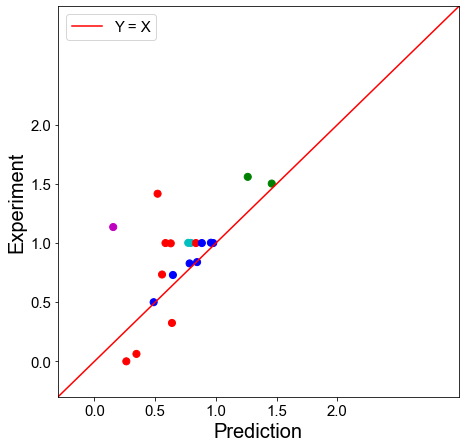

In [48]:
categories = np.array([0, 0, 1, 2, 0, 2, 3, 0, 0, 0, 2, 2, 0, 1, 2, 0, 3, 4, 2, 2])
colormap = np.array(['r', 'g', 'b', 'c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list12, a_list12, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

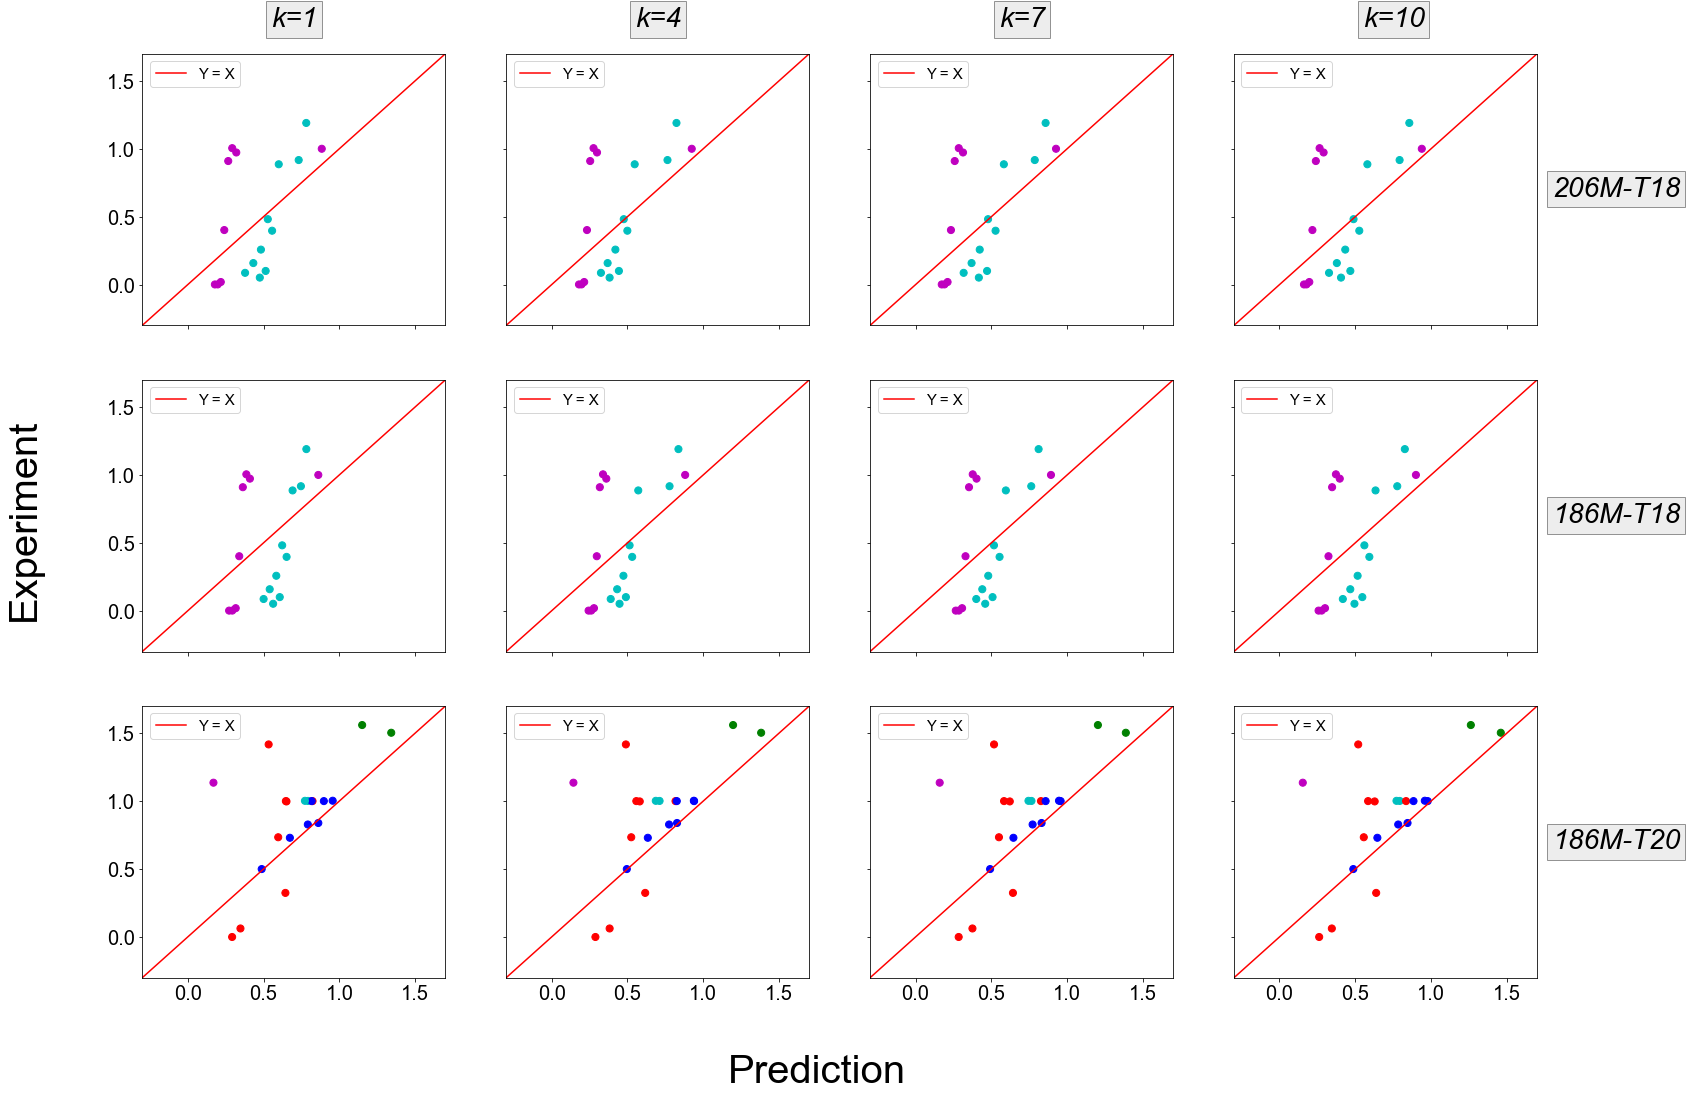

In [50]:
fig, axs = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(25, 17))


fig.text(0.5, 0.04, 'Prediction', ha='center', fontsize=40)
fig.text(0.05, 0.5, 'Experiment', va='center', rotation='vertical', fontsize=40)

plt.rc('xtick', labelsize=20)

plt.rc('ytick', labelsize=20)

categories = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
colormap = np.array(['c', 'm'])

categories1 = np.array([0, 0, 1, 2, 0, 2, 3, 0, 0, 0, 2, 2, 0, 1, 2, 0, 3, 4, 2, 2])
colormap1 = np.array(['r', 'g', 'b', 'c', 'm'])


axs[0,0].scatter(b_list, a_list, s=50, c=colormap[categories])
axs[0,0].plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
axs[0,0].legend(fontsize=15)
#plt.xlabel('Prediction', fontsize=20)
#plt.ylabel('Experiment', fontsize=20)

axs[0,0].text(0.55, 1.9, 'k=1', fontsize=28, style='italic',
        bbox={'facecolor': 'lightgrey', 'alpha': 0.4, 'pad': 5})

#axs[0,0].text(1.6, 0.65, '206M-T18', fontsize=28, style='italic',
#        bbox={'facecolor': 'lightgrey', 'alpha': 0.4, 'pad': 5})

axs[0,0].set_ylim(-0.3, 1.7)
axs[0,0].set_xlim(-0.3, 1.7)


axs[0,1].scatter(b_list2, a_list2, s=50, c=colormap[categories])
axs[0,1].plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
axs[0,1].legend(fontsize=15)
#plt.xlabel('Prediction', fontsize=20)
#plt.ylabel('Experiment', fontsize=20)

axs[0,1].text(0.55, 1.9, 'k=4', fontsize=28, style='italic',
        bbox={'facecolor': 'lightgrey', 'alpha': 0.4, 'pad': 5})

axs[0,1].set_ylim(-0.3, 1.7)
axs[0,1].set_xlim(-0.3, 1.7)



axs[0,2].scatter(b_list3, a_list3, s=50, c=colormap[categories])
axs[0,2].plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
axs[0,2].legend(fontsize=15)
#plt.xlabel('Prediction', fontsize=20)
#plt.ylabel('Experiment', fontsize=20)

axs[0,2].text(0.55, 1.9, 'k=7', fontsize=28, style='italic',
        bbox={'facecolor': 'lightgrey', 'alpha': 0.4, 'pad': 5})

axs[0,2].set_ylim(-0.3, 1.7)
axs[0,2].set_xlim(-0.3, 1.7)


axs[0,3].scatter(b_list4, a_list4, s=50, c=colormap[categories])
axs[0,3].plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
axs[0,3].legend(fontsize=15)
#plt.xlabel('Prediction', fontsize=20)
#plt.ylabel('Experiment', fontsize=20)

axs[0,3].text(0.55, 1.9, 'k=10', fontsize=28, style='italic',
        bbox={'facecolor': 'lightgrey', 'alpha': 0.4, 'pad': 5})

axs[0,3].text(1.8, 0.65, '206M-T18', fontsize=28, style='italic',
        bbox={'facecolor': 'lightgrey', 'alpha': 0.4, 'pad': 5})


axs[0,3].set_ylim(-0.3, 1.7)
axs[0,3].set_xlim(-0.3, 1.7)



axs[1,0].scatter(b_list5, a_list5, s=50, c=colormap[categories])
axs[1,0].plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
axs[1,0].legend(fontsize=15)
#plt.xlabel('Prediction', fontsize=20)
#plt.ylabel('Experiment', fontsize=20)

axs[1,0].set_ylim(-0.3, 1.7)
axs[1,0].set_xlim(-0.3, 1.7)


axs[1,1].scatter(b_list6, a_list6, s=50, c=colormap[categories])
axs[1,1].plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
axs[1,1].legend(fontsize=15)
#plt.xlabel('Prediction', fontsize=20)
#plt.ylabel('Experiment', fontsize=20)

axs[1,1].set_ylim(-0.3, 1.7)
axs[1,1].set_xlim(-0.3, 1.7)



axs[1,2].scatter(b_list7, a_list7, s=50, c=colormap[categories])
axs[1,2].plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
axs[1,2].legend(fontsize=15)
#plt.xlabel('Prediction', fontsize=20)
#plt.ylabel('Experiment', fontsize=20)

axs[1,2].set_ylim(-0.3, 1.7)
axs[1,2].set_xlim(-0.3, 1.7)


axs[1,3].scatter(b_list8, a_list8, s=50, c=colormap[categories])
axs[1,3].plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
axs[1,3].legend(fontsize=15)
#plt.xlabel('Prediction', fontsize=20)
#plt.ylabel('Experiment', fontsize=20)

axs[1,3].text(1.8, 0.65, '186M-T18', fontsize=28, style='italic',
        bbox={'facecolor': 'lightgrey', 'alpha': 0.4, 'pad': 5})

axs[1,3].set_ylim(-0.3, 1.7)
axs[1,3].set_xlim(-0.3, 1.7)

axs[2,0].scatter(b_list9, a_list9, s=50, c=colormap1[categories1])
axs[2,0].plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
axs[2,0].legend(fontsize=15)
#plt.xlabel('Prediction', fontsize=20)
#plt.ylabel('Experiment', fontsize=20)

axs[2,0].set_ylim(-0.3, 1.7)
axs[2,0].set_xlim(-0.3, 1.7)

axs[2,1].scatter(b_list10, a_list10, s=50, c=colormap1[categories1])
axs[2,1].plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
axs[2,1].legend(fontsize=15)
#plt.xlabel('Prediction', fontsize=20)
#plt.ylabel('Experiment', fontsize=20)

axs[2,1].set_ylim(-0.3, 1.7)
axs[2,1].set_xlim(-0.3, 1.7)

axs[2,2].scatter(b_list11, a_list11, s=50, c=colormap1[categories1])
axs[2,2].plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
axs[2,2].legend(fontsize=15)
#plt.xlabel('Prediction', fontsize=20)
#plt.ylabel('Experiment', fontsize=20)

axs[2,2].set_ylim(-0.3, 1.7)
axs[2,2].set_xlim(-0.3, 1.7)


axs[2,3].scatter(b_list12, a_list12, s=50, c=colormap1[categories1])
axs[2,3].plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
axs[2,3].legend(fontsize=15)
#plt.xlabel('Prediction', fontsize=20)
#plt.ylabel('Experiment', fontsize=20)

axs[2,3].text(1.8, 0.65, '186M-T20', fontsize=28, style='italic',
        bbox={'facecolor': 'lightgrey', 'alpha': 0.4, 'pad': 5})

axs[2,3].set_ylim(-0.3, 1.7)
axs[2,3].set_xlim(-0.3, 1.7)

plt.savefig('Fig8NewELUReLU.pdf', transparent=True, format='pdf', bbox_inches='tight')